![](images/class_movie4.gif)

## Modelling Land Use change with socio-economic drivers: Teacher page

Having derived a dataset of urban land use, we can calculate urban land use change per year.

Following the general approach of [Seto & Kaufmann (2003)](reading/SetoandKaufmann2003.pdf), we will build a multi-linear model to attempt to describe the urban land use change per year (the 'y' variable) as a function of a number of key socioeconomic factors (e.g. capital investment, land productivity, population, wage rates, etc) (the '$x$' variables). 

We suppose that we have observation ('$y$') data for $N_{years}$ and $N_{params}$ of socioeconomic factors for each of these years.

So, we will derive a (multi)*linear* model that we could phrase as:

**Equation 1:**
$$
y = c +  M x                
$$

where we supply the following information:

* $y$ is a column vector of length $N_{years} - 1$ with urban land use change per year. The minus 1 is because we must calculate land use *change* from one year to the next.
* $x$ is an information matrix of size $N_{params} - 1$ by  $N_{years} - 1$ (one entry for each year, for each socioeconomic factor). The minus 1 associated with $N_{params}$ is because we have an additional parameter, $c$.

The model parameters above (i.e. the information we need to derive by fitting to the data) are called $M$ and $c$. Here, $M$ would be a row vector of size $N_{params} - 1$ and $c$ is a scalar. So there are a total of $N_{params}$ *unknown* values (the model parameters) that we need to estimate. 

Following the example in the paper, we will use the following in $x$:

* $x_1$: Investment in capital construction / population
* $x_2$: value of gross agricultural output / agriculture population
* $x_3$: log(wages in non-state, non-collective units)
* $x_4$: log(average total wage)
* $x_5$: (value of gross agricultural output/Agricultural land) / (value of gross industrial output / Urban land)

This will give a model with 6 parameters that we need to estimate (i.e. 6 unknowns) that we could call $p_0, p_1, p_2, p_3, p_4, p_5$. We could then write the general model more specifically as:

**Equation 2:**

$$
y = p_0 + p_1 x_1 + p_2 x_2 + + p_3 x_3 + p_4 x_4 + p_5 x_5
$$

Note that the final term ($x_5$) requires that we have data for Agricultural and Urban land, which we will need to derive from the remote sensing data for each year of observation.

The rest of the data will come from official statistics. An example for the years 1987 to 2000 is given below to give you a feel for the sort of information you will be using:

## Gathering socio-economic data

There are many freely available online database for downloading important socio-economic data. Some examples are the Center for International Earth Science Information Network (CIESIN) at Columbia University and the World Bank. The data we will be using here are from the [Guangdong Statistical Yearbook](http://www.gdstats.gov.cn/tjnj/2006/ml_e.htm).

![](images/page.png)

A spreadsheet with relevant data has been compiled and can be downloaded [here](files/Guangdong-Yearbook-2019.xlsx)

Note that the classification results in the spreadsheet are the lecturers' results and **must not** be used in student analyses (i.e. you must put in your own classification results).

You will only be able to run the model for years that you have driving (socioeconomic) and Landsat data.


##  Applying the models

Here, we provide some code to calibrate and test the required model:

In [108]:
# read LUC data  & socio data
book = 'files/Guangdong-Yearbook-2019.xlsx'
%matplotlib inline

In [140]:
import xlrd
import numpy as np
import pandas as pd

# This part reads the data from the excel file
# given above as 'book'

# utility
def getfloats(sheet,c):
    return np.array([i for i in sheet.col_values(c)[1:] \
                     if type(i) == float])
# open the excel file
bookf = xlrd.open_workbook(book)
sheet = bookf.sheet_by_index(0) # Get the first sheet
# get the column headings
headings = sheet.row_values(0,end_colx=13)
# read the years from 1st col
year = getfloats(sheet,0)
# read each heading
data = {}
n = len(year)
for i,h in enumerate(headings):
    data[h] = getfloats(sheet,i)[:n]
print(year)

[1987. 1988. 1989. 1990. 1991. 1992. 1993. 1994. 1995. 1996. 1997. 1998.
 1999. 2000. 2001. 2002. 2003. 2004. 2005. 2006. 2007. 2008. 2009. 2010.
 2011. 2012. 2013. 2014. 2015. 2016. 2017. 2018.]


In [141]:
# lets see what we have
print (year.shape)
n = year.shape[0]
for i in headings[1:]:
    print(i,data[i].shape)
    n = min([n,data[i].shape[0]])
    
#n = 14

(32,)
Complete investment in capital construction (固投) 亿元 (32,)
实际利用外资(万美元) (31,)
population (年末户籍总人口数) 万人 (31,)
wages in non-state, non-collective units 亿元 (31,)
value of gross agricultural output 亿元 (31,)
value of gross inductrial output 亿元 (31,)
agriculture population 万人 (31,)
average total wage 元 (31,)
Agricultural pixels (31,)
Urban pixels (31,)
Growth (Meansured) (30,)
invest / pop (31,)


30


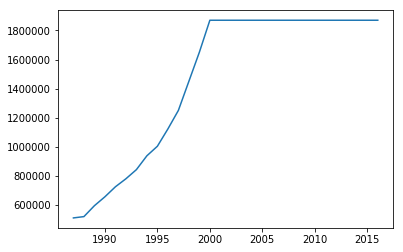

In [152]:
# simplify and load variables
# shorten to length n-1 because need growth
# ie difference
investment = data[headings[1]][:n-1]
population = data[headings[3]][:n-1]
private_wage = data[headings[4]][:n-1]
agr_output = data[headings[5]][:n-1]
indust_output = data[headings[6]][:n-1]
agr_pop = data[headings[7]][:n-1]
avg_wage = data[headings[8]][:n-1]

#shortened year array
year = year[:n]

p1 = pd.DataFrame({'year':year[:n],
                  'investment':data[headings[1]][:n],
                  'population':data[headings[3]][:n],
                  'private_wage':data[headings[4]][:n],
                  'agr_output':data[headings[5]][:n],
                  'indust_output':data[headings[6]][:n],
                  'agr_pop':data[headings[7]][:n],
                  'avg_wage':data[headings[8]][:n]
                 })

# save the files as csv

p1.to_csv('files/Guangdong-Yearbook-2019.csv')
print(n)

plt.plot(year[:n],data[headings[10]][:n])

p2 = pd.DataFrame({'year':year[:n],'urban_land':data[headings[10]][:n]})
p2.to_csv('files/results-2019.csv')

1987.0 2016.0
30 (30,)


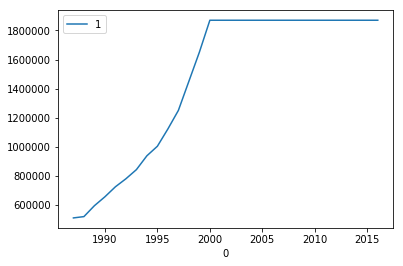

In [143]:
# You can plug your own values or urban land in here
# rather than modifying the spreadsheet
print(year[0],year[-1])
# type your own urban_land in here to override whats in
# the spreadsheet: this example has dummy values for > 2000
urban_land = data[headings[10]][:n]
urban_land = np.array(urban_land)[:n+1]
print(n,urban_land.shape)
p = pd.DataFrame(np.array([year,urban_land]).T)
p.plot(x=0)

In [144]:
%matplotlib inline

import statsmodels.api as sm
import matplotlib.pyplot as plt

# we dont trust ag land stats
# so instead here, we estimate it from the urban land
agr_land = 2*urban_land.max() - urban_land

growth = urban_land[1:]-urban_land[:-1]

urban_land = urban_land[:n-1]
agr_land   = agr_land[:n-1]

data_matrix = np.transpose(np.array([\
                investment[:n]*0+1,\
                investment[:n]/population[:n], \
                agr_output[:n]/agr_pop[:n], \
                np.log(private_wage[:n]), \
                np.log(avg_wage[:n]), \
                (agr_output[:n]/agr_land[:n])/(indust_output[:n]/urban_land[:n])\
                ]))[1:]
dyear = year[1:]
print (growth.shape)
print (urban_land.shape,data_matrix.shape,dyear.shape)

(29,)
(29,) (28, 6) (29,)


In [148]:
# regress growth as function of terms in
# data matrix
pp = np.linalg.lstsq(data_matrix[:14], growth[:14],rcond=None)
print ('parameters for multilinear-regression'),
for i,j in enumerate(pp[0]):
    print (f'p_{i}',j)

RMSE = np.sqrt(pp[1]/float(len(growth)))
print(RMSE)

print(year.shape,n,growth.shape)

parameters for multilinear-regression
p_0 4080997.827514034
p_1 382852.6893074923
p_2 978188.2678790543
p_3 197297.43765476544
p_4 -616966.3754362684
p_5 3003448.3374686185
[25517.0067571]
(30,) 30 (29,)




year [1988. 1989. 1990. 1991. 1992. 1993. 1994. 1995. 1996. 1997. 1998. 1999.
 2000. 2001. 2002. 2003. 2004. 2005. 2006. 2007. 2008. 2009. 2010. 2011.
 2012. 2013. 2014. 2015. 2016.]


data [  9000.  75000.  61244.  68756.  55000.  62833.  95232.  65646. 118748.
 127541. 200000. 200000. 220000.      0.      0.      0.      0.      0.
      0.      0.      0.      0.      0.      0.      0.      0.      0.
      0.      0.]


model [  64909.27301822  155614.43364936  227284.75829929  364688.80023819
  370724.42293099  453523.12275953  583555.4531883   642491.552534
  801795.03580854  946852.12563298 1095028.95738297 1408937.50866073
 1541491.82223873 1959820.21133217]


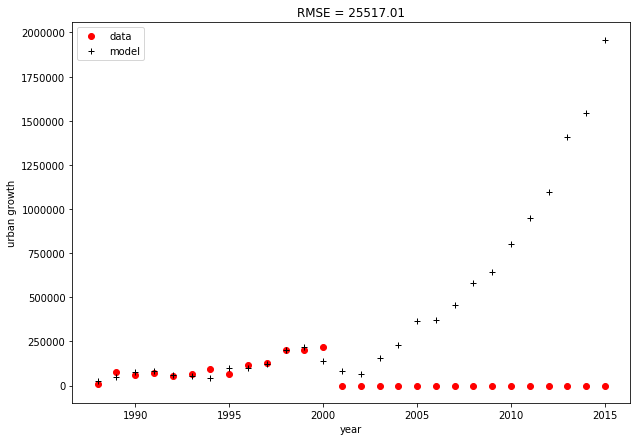

In [150]:
plt.figure(figsize=(10,7))
plt.title('RMSE = %.2f'%RMSE)
fwd = np.sum(pp[0]*data_matrix, axis=1)

plt.plot(year[1:-1], growth[:-1],'ro',label='data')
plt.plot(year[1:-1], fwd,'k+',label='model')
plt.xlabel('year')
plt.ylabel('urban growth')
plt.legend(loc='best')

print ('\n\nyear',dyear)
print ('\n\ndata',growth)
print ('\n\nmodel',fwd[14:])

The material above provides all of the computer code you would need to apply the model, though you may wish to code it yourself in R. 

You **must** put in your own data from the classification result however (and this information must be traceable from your `Results`).

You should make some attempt to assess the accuracy of any model that you build. This is perhaps most readily achieved by some form of cross-validation (leave one sample out and test how well it is modelled).

You must explain and reference the models that you use (in a `Theory` section of simply a `Models` section) and claerly and traceably present all results (in `Model Results` section/sub-section). You must explain the approach taken for your accuracy assessment and present the results.

A discussion of the results (from the classification and modelling) must be in a `Discussion` section of the report. You should make sure to discuss the uncertainty in the classification(s) and the modelling. Comment on what the expected 'reliability' of such a model might be in this context.

A sufficient (i.e. pass) mark for the relevant section will be awarded if you correctly (assuming the classification results you have obtained are 'true') complete the model calibration (using the code above or excel or any other tool you are familiar with, provided you show your working), show all relevant results and properly plot the modelling results (as above). You will need to include more than a token effort at uncertainty estimation.

### Summary

* Using the data derived above, calibrate a model that describes urban land use change as a function of a set of socioeconomic factors, following the approach of Seto et al. (2002, 2003) **(of primary importance)**

![](images/comp.png)

* Test the model to assess uncertainty **(of secondary importance)**

